In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from kid_readout.interactive import *

INFO     2016-11-22 12:50:42,723 - kid_readout.<module>:13  kid_readout logging setup with default stream handler


In [3]:
import glob

In [4]:
import joblib
import pandas as pd

In [139]:
import seaborn as sns
sns.set_context('paper')
sns.set(font_scale=1.5)

In [6]:
fns = glob.glob('/artemis/readout/2016-11-20_2[123]*')
fns += glob.glob('/artemis/readout/2016-11-21_0*')
fns += glob.glob('/artemis/readout/2016-11-21_1*')
fns += glob.glob('/artemis/readout/2016-11-21_2*')
fns += glob.glob('/artemis/readout/2016-11-22_0*')
fns += glob.glob('/artemis/readout/2016-11-22_1*')


fns.sort()

In [7]:
def get_df(fn):
    try:
        ncf = NCFile(fn)
#        print fn
        ssa = basic.SweepStreamArray(ncf.SweepArray0,ncf.StreamArray1)
        return ssa.to_dataframe()    
    except Exception as e:
#        print "bad:",fn,e
        return None


In [8]:
pp = joblib.Parallel(n_jobs=20,verbose=5)

In [9]:
rows = pp([joblib.delayed(get_df)(fn) for fn in fns])

[Parallel(n_jobs=20)]: Done  32 tasks      | elapsed:  1.4min
[Parallel(n_jobs=20)]: Done 122 tasks      | elapsed:  4.6min
[Parallel(n_jobs=20)]: Done 248 tasks      | elapsed:  9.3min
[Parallel(n_jobs=20)]: Done 294 out of 294 | elapsed: 10.9min finished


In [10]:
rows = [row for row in rows if row is not None]

In [11]:
len(rows)

289

In [12]:
df = pd.concat(rows,ignore_index=True)

In [13]:
df.shape

(2312, 63)

In [14]:
from kid_readout.equipment import starcryo_temps
reload(starcryo_temps)
reload(starcryo_temps.kid_readout.analysis.resources.experiments.starcryo_experiments)

updated file list
updated file list


<module 'kid_readout.analysis.resources.starcryo_experiments' from '/home/gjones/kid_readout/kid_readout/analysis/resources/starcryo_experiments.pyc'>

In [15]:
starcryo_temps.kid_readout.analysis.resources.experiments.starcryo_experiments.thermometry_2016_11_14

{'load': 1, 'package': 9, 'secondary_package': 11}

In [16]:
pkg,pkg2,load,_=starcryo_temps.get_temperatures_at(df.start_epoch)

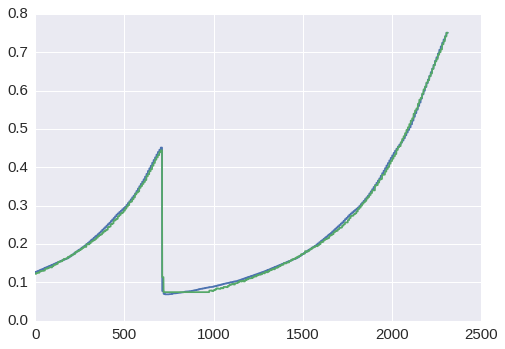

In [17]:
plot(pkg)
plot(pkg2)

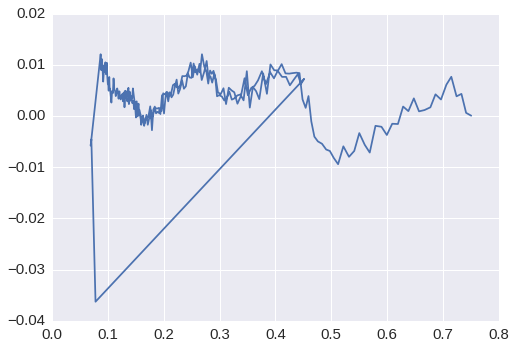

In [398]:
plot(pkg,pkg-pkg2)

In [18]:
df['package_temperature'] = pkg

In [48]:
df.start_epoch.ix[711]

1479736748.6827691

In [47]:
df.package_temperature.ix[711]

0.45157518836368321

In [395]:
valid = df[(df.start_epoch>1479737349.6827691) & (df.package_temperature<0.25)]

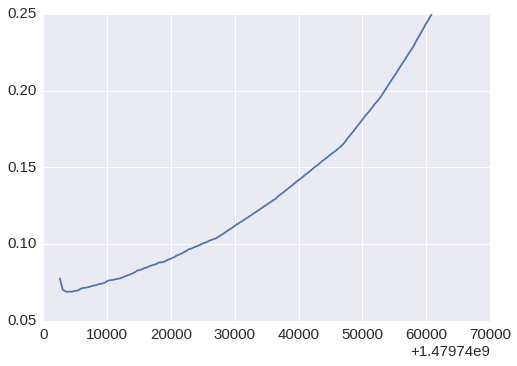

In [396]:
plot(valid.start_epoch,valid.package_temperature)

In [136]:
valid.roach_dac_attenuation.value_counts()

39.0    512
36.0    488
Name: roach_dac_attenuation, dtype: int64

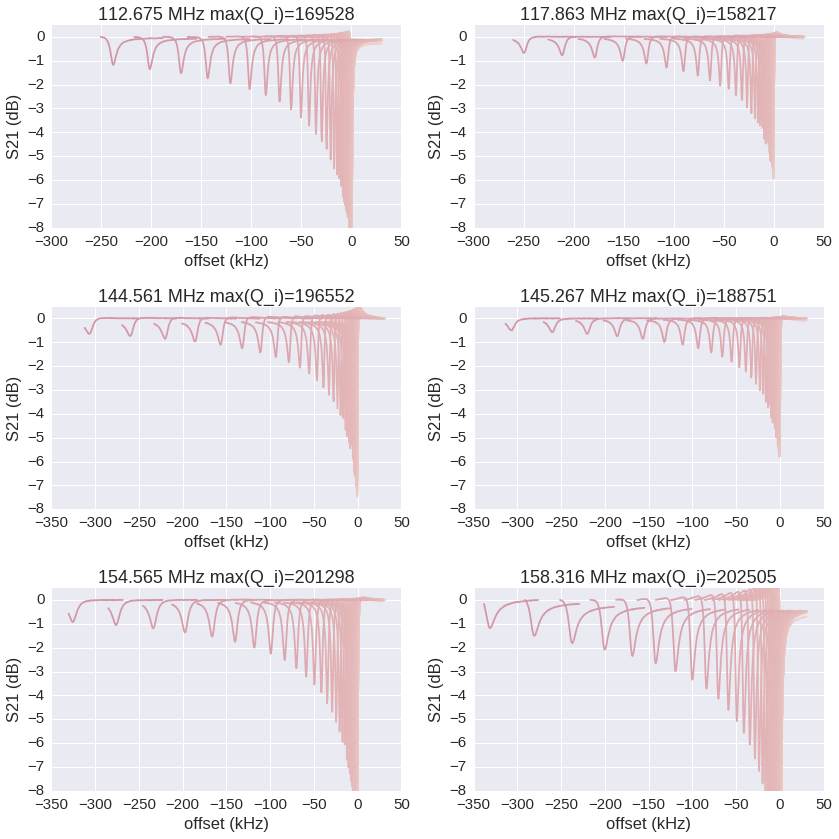

In [62]:
pal = sns.cubehelix_palette(as_cmap=True)
min_temp = df.package_temperature.min()
ptp_temp = df.package_temperature.ptp()
def get_color(t):
    return pal((row.package_temperature-min_temp)/ptp_temp)
fig,axs = subplots(3,2,figsize=(12,12))
for k,ax in enumerate(axs.flatten()):
    dd = valid[(valid.number==k) & (valid.roach_dac_attenuation==39)]
    for m,row in dd.iterrows():
        ax.plot((row.res_frequency_data-dd.res_f_0.max())/1e3,dB(row.res_s21_data)-max([dB(row.res_s21_data[ii]) for ii in [0,-1]]),
               color = get_color(row.package_temperature),
                label=('%.0f mK' % (1e3*row.package_temperature)))
    ax.set_title('%.3f MHz max(Q_i)=%.0f' % (dd.res_f_0.max()/1e6,dd.res_Q_i.max()))
    #ax.set_xlim(-200,50)
    ax.set_ylim(-8,0.5)
    ax.set_ylabel('S21 (dB)')
    ax.set_xlabel('offset (kHz)')
#axs[0,0].legend(loc='lower left',prop=dict(size='x-small'),ncol=3)
fig.tight_layout()

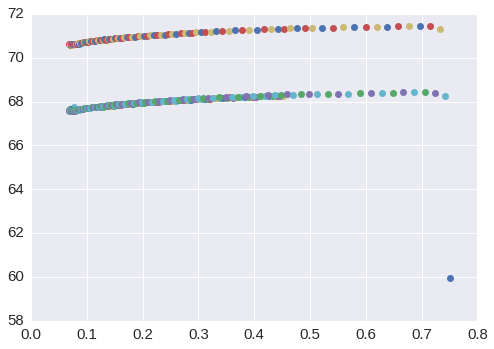

In [26]:
dd = valid[(valid.number==7)]
for m,row in dd.iterrows():
    plot(row.package_temperature,dB(row.res_s21_data.min()),'o')

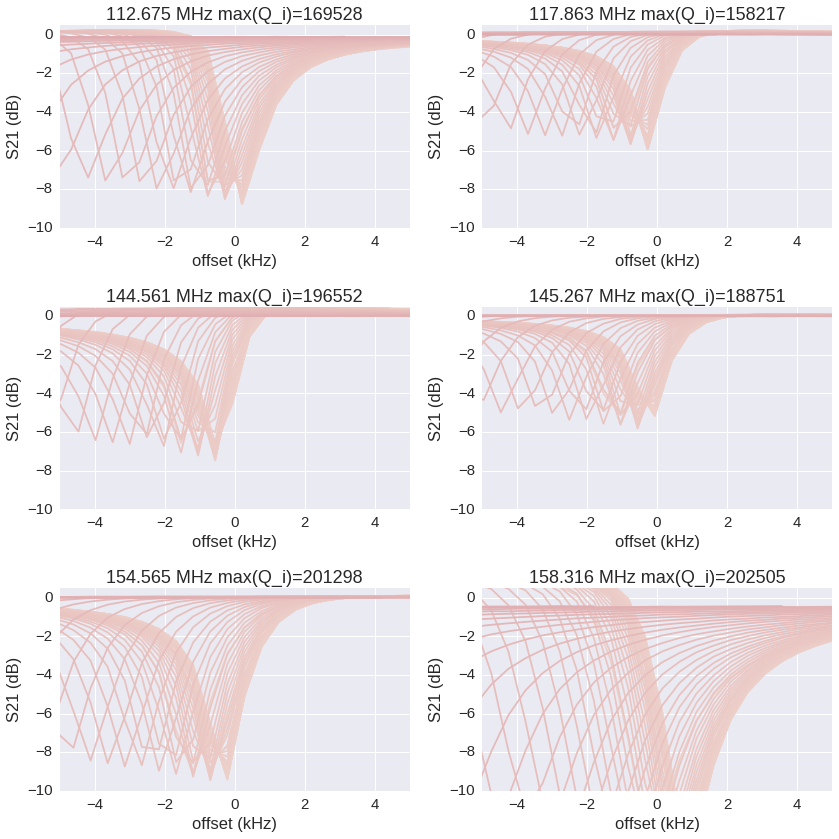

In [63]:
pal = sns.cubehelix_palette(as_cmap=True)
min_temp = df.package_temperature.min()
ptp_temp = df.package_temperature.ptp()
def get_color(t):
    return pal((row.package_temperature-min_temp)/ptp_temp)
fig,axs = subplots(3,2,figsize=(12,12))
for k,ax in enumerate(axs.flatten()):
    dd = valid[(valid.number==k) & (valid.roach_dac_attenuation==39)]
    for m,row in dd.iterrows():
        ax.plot((row.res_frequency_data-dd.res_f_0.max())/1e3,dB(row.res_s21_data)-max([dB(row.res_s21_data[ii]) for ii in [0,-1]]),
               color = get_color(row.package_temperature),
                label=('%.0f mK' % (1e3*row.package_temperature)))
    ax.set_title('%.3f MHz max(Q_i)=%.0f' % (dd.res_f_0.max()/1e6,dd.res_Q_i.max()))
    ax.set_xlim(-5,5)
    ax.set_ylim(-10,0.5)
    ax.set_ylabel('S21 (dB)')
    ax.set_xlabel('offset (kHz)')
#axs[0,0].legend(loc='lower left',prop=dict(size='x-small'),ncol=3)
fig.tight_layout()

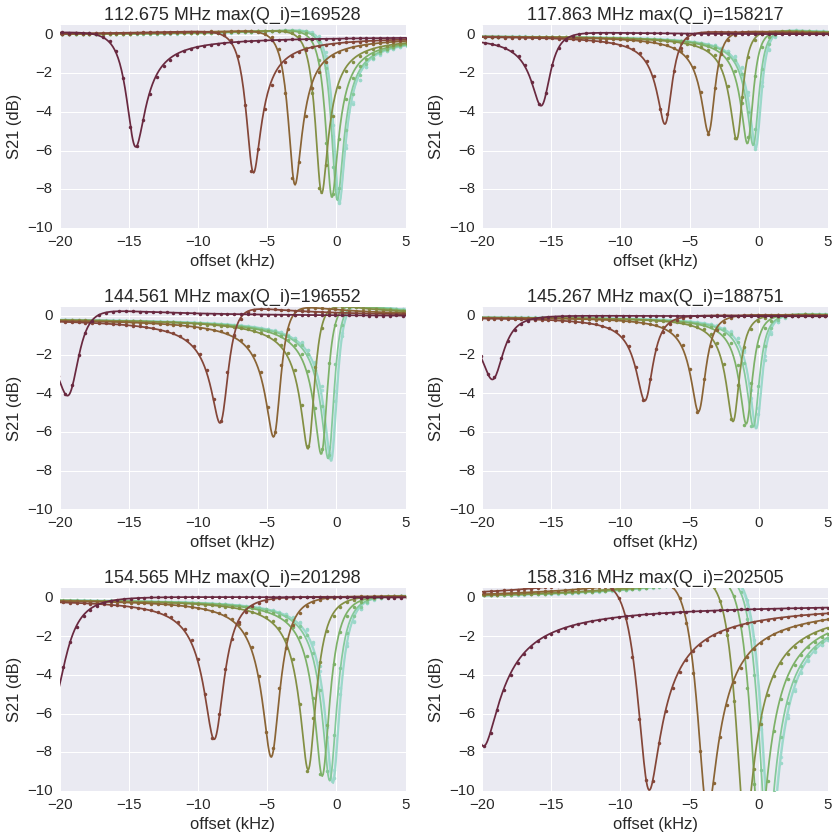

In [133]:
pal = sns.cubehelix_palette(as_cmap=True,rot=1,reverse=True,light=0.2,dark=.8,hue=1)
min_temp = df.package_temperature.min()
ptp_temp = df.package_temperature.ptp()
temperatures = np.linspace(0.06,0.16,8)#[0.06,0.08,0.1,0.15,0.2,0.25,0.3]
ptp_temp = temperatures.ptp()
def get_color(t):
    return pal((row.package_temperature-min_temp)/ptp_temp)

fig,axs = subplots(3,2,figsize=(12,12))
for k,ax in enumerate(axs.flatten()):
    dd = valid[(valid.number==k) & (valid.roach_dac_attenuation==39)]
    for offset,temperature in enumerate(temperatures):
        row = dd.ix[np.abs(dd.package_temperature-temperature).argmin()]
        #print temperature,row.package_temperature
#        for m,row in ddt.iterrows():
        ax.plot((row.res_model_frequency-dd.res_f_0.max())/1e3,dB(row.res_model_s21)-max([dB(row.res_s21_data[ii]) for ii in [0,-1]]),
               color = get_color(row.package_temperature),)
        ax.plot((row.res_frequency_data-dd.res_f_0.max())/1e3,dB(row.res_s21_data)-max([dB(row.res_s21_data[ii]) for ii in [0,-1]]),'.',
               color = get_color(row.package_temperature),
                label=('%.0f mK' % (1e3*row.package_temperature)))
    ax.set_title('%.3f MHz max(Q_i)=%.0f' % (dd.res_f_0.max()/1e6,dd.res_Q_i.max()))
    ax.set_xlim(-20,5)
    ax.set_ylim(-10,0.5)
    ax.set_ylabel('S21 (dB)')
    ax.set_xlabel('offset (kHz)')
#axs[0,0].legend(loc='lower left',prop=dict(size='x-small'),ncol=3)
fig.tight_layout()

In [159]:
from adjustText import adjust_text

0.06 0.0689890214068 144560535.976
0.0825 0.082904936453 144560512.967
0.105 0.106075218423 144559641.101
0.1275 0.126972992382 144557557.407
0.15 0.151431335541 144549347.637


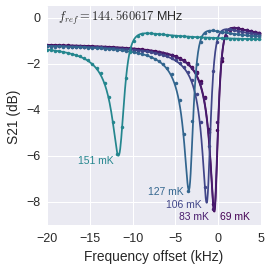

In [464]:
#pal = sns.cubehelix_palette(as_cmap=True,rot=1,reverse=True,light=0.2,dark=.8,hue=1)
#pal = sns.diverging_palette(0,90,center='dark',as_cmap=True)
sns.set(font_scale=1.25)
pal = cm.viridis
min_temp = df.package_temperature.min()
ptp_temp = df.package_temperature.ptp()
temperatures = np.linspace(0.06,0.15,5)#[0.06,0.08,0.1,0.15,0.2,0.25,0.3]
ptp_temp = temperatures.ptp()*2
def get_color(t):
    return pal((row.package_temperature-min_temp)/ptp_temp)

fig,ax = subplots(1,1,figsize=(4,4))
k = 2
dd = valid[(valid.number==k) & (valid.roach_dac_attenuation==39)]
texts = []
for offset,temperature in enumerate(temperatures):
    row = dd.ix[np.abs(dd.package_temperature-temperature).argmin()]
    print temperature,row.package_temperature,row.res_f_0
#        for m,row in ddt.iterrows():
    ax.plot((row.res_model_frequency-dd.res_f_0.max())/1e3,-1+dB(row.res_model_s21)-max([dB(row.res_s21_data[ii]) for ii in [0,-1]]),
           color = get_color(row.package_temperature),)
    ax.plot((row.res_frequency_data-dd.res_f_0.max())/1e3,-1+dB(row.res_s21_data)-max([dB(row.res_s21_data[ii]) for ii in [0,-1]]),'.',
           color = get_color(row.package_temperature),
            label=('%.0f mK' % (1e3*row.package_temperature)))
    x = (row.res_model_frequency-dd.res_f_0.max())/1e3
    y = -1+dB(row.res_model_s21)-max([dB(row.res_s21_data[ii]) for ii in [0,-1]])
    txt = ('%.0f mK' % (1e3*row.package_temperature))
    idx = y.argmin()
    if row.package_temperature < 0.07:
        xoffset = 40
    else:
        xoffset = 0
    if (abs(row.package_temperature- 0.106) < 1e-3) or (abs(row.package_temperature- 0.127) < 1e-3):
        yoffset=4
    else:
        yoffset=0
    ax.annotate(txt,xy=(x[idx],y[idx]),xytext=(-5+xoffset,yoffset),xycoords='data',textcoords='offset points',
               fontsize='x-small',ha='right',va='top',
               color=get_color(row.package_temperature))
    #texts.append(ax.text(x[idx],y[idx],txt,fontsize='x-small',color = get_color(row.package_temperature)))
#ax.set_title('%.3f MHz max(Q_i)=%.0f' % (dd.res_f_0.max()/1e6,dd.res_Q_i.max()))
ax.set_xlim(-20,5)
ax.set_ylim(-9,0.5)
ax.set_ylabel('S21 (dB)')
ax.set_xlabel('Frequency offset (kHz)')
ax.text(0.05,0.99,("$f_{ref}=%.6f$ MHz" % (dd.res_f_0.max()/1e6)),transform=ax.transAxes,size='small',va='top')
#axs[0,0].legend(loc='lower left',prop=dict(size='x-small'),ncol=3)
#adjust_text(texts,ax=ax,only_move={'points':'x','text':'x'})
fig.tight_layout()
fig.savefig('/home/gjones/paper_plots/almn_s21.pdf',bbox_inches='tight')

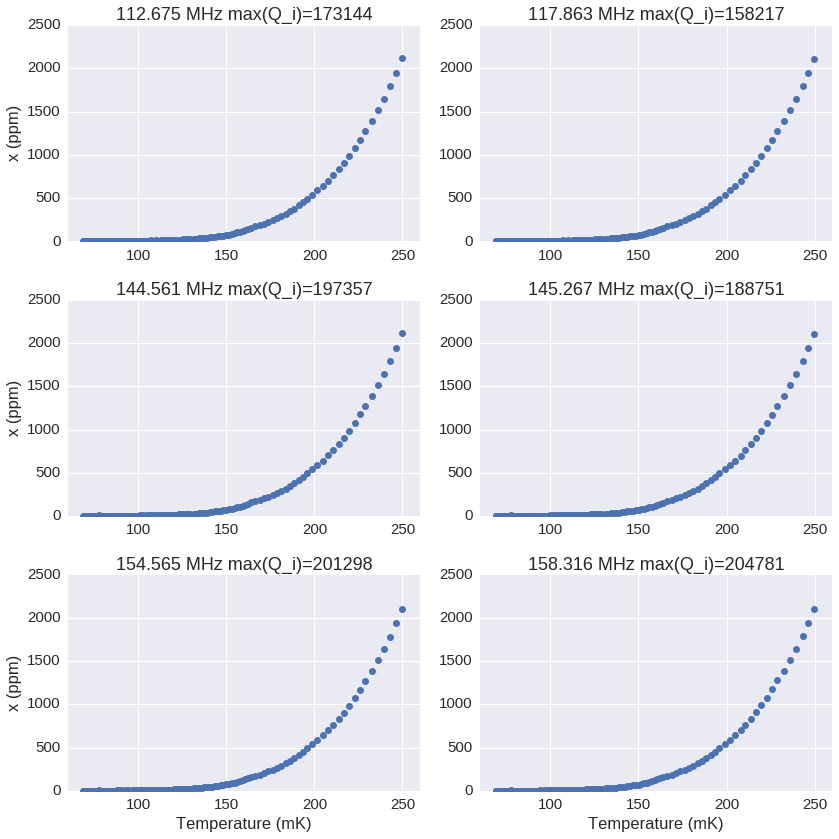

In [64]:
fig,axs = subplots(3,2,figsize=(12,12))
for k,ax in enumerate(axs.flatten()):
    dd = valid[(valid.number==k)]
    ax.plot(dd.package_temperature*1e3,1e6*(1-dd.res_f_0/dd.res_f_0.max()),'o')
    ax.set_title('%.3f MHz max(Q_i)=%.0f' % (dd.res_f_0.max()/1e6,dd.res_Q_i.max()))
    ax.set_xlim(60,260)
    #ax.set_ylim(-10,1200)
for ax in axs[:,0]:
    ax.set_ylabel('x (ppm)')
for ax in axs[-1,:]:
    ax.set_xlabel('Temperature (mK)')
fig.tight_layout()

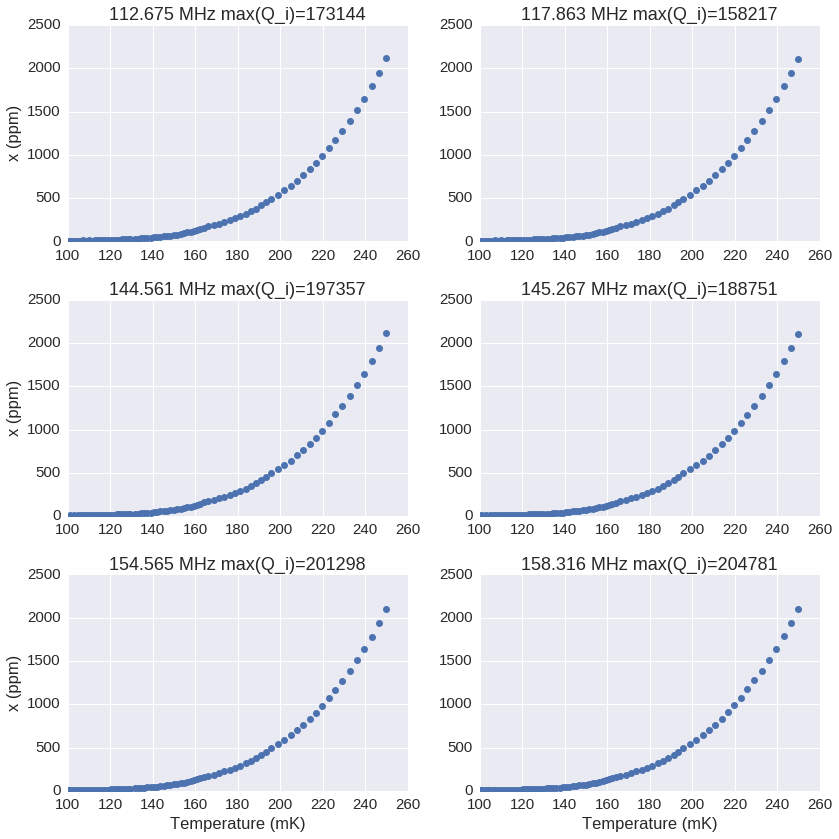

In [65]:
fig,axs = subplots(3,2,figsize=(12,12))
for k,ax in enumerate(axs.flatten()):
    dd = valid[(valid.number==k)]
    ax.plot(dd.package_temperature*1e3,1e6*(1-dd.res_f_0/dd.res_f_0.max()),'o')
    ax.set_title('%.3f MHz max(Q_i)=%.0f' % (dd.res_f_0.max()/1e6,dd.res_Q_i.max()))
    ax.set_xlim(100,260)
    #ax.set_ylim(-10,1200)
for ax in axs[:,0]:
    ax.set_ylabel('x (ppm)')
for ax in axs[-1,:]:
    ax.set_xlabel('Temperature (mK)')
fig.tight_layout()

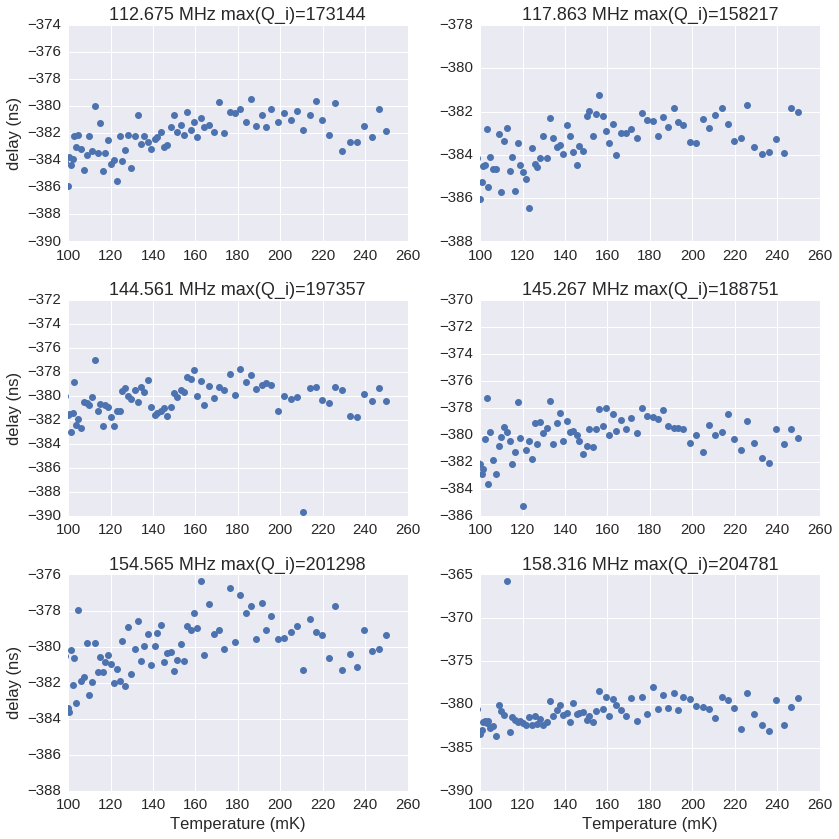

In [112]:
fig,axs = subplots(3,2,figsize=(12,12))
for k,ax in enumerate(axs.flatten()):
    dd = valid[(valid.number==k)]
    ax.plot(dd.package_temperature*1e3,1e9*dd.res_delay,'o')
    ax.set_title('%.3f MHz max(Q_i)=%.0f' % (dd.res_f_0.max()/1e6,dd.res_Q_i.max()))
    ax.set_xlim(100,260)
    #ax.set_ylim(-10,1200)
for ax in axs[:,0]:
    ax.set_ylabel('delay (ns)')
for ax in axs[-1,:]:
    ax.set_xlabel('Temperature (mK)')
fig.tight_layout()

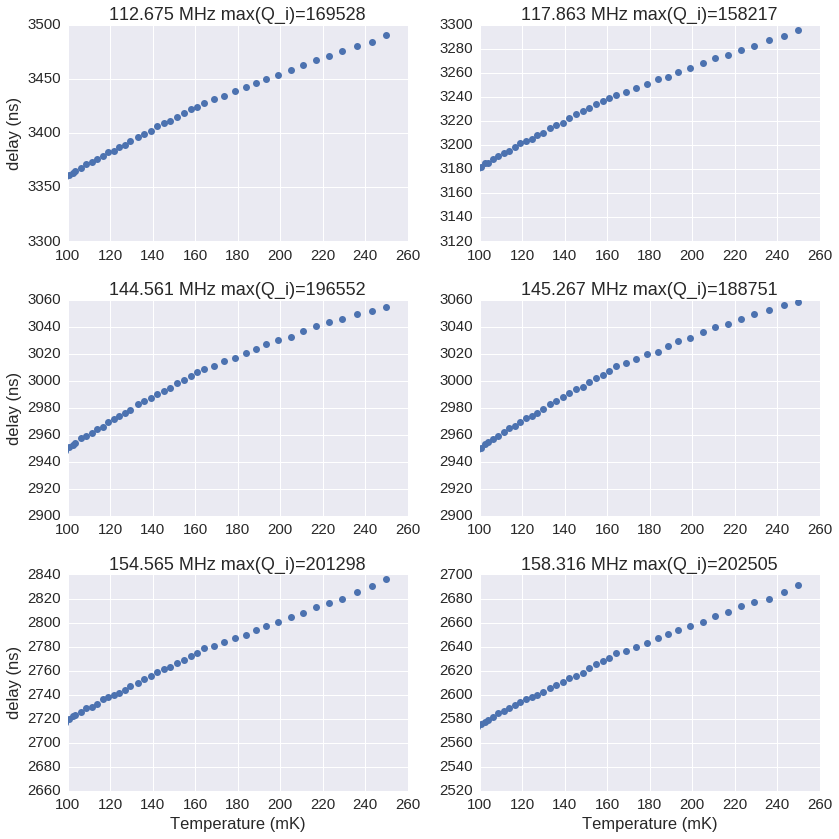

In [115]:
fig,axs = subplots(3,2,figsize=(12,12))
for k,ax in enumerate(axs.flatten()):
    dd = valid[(valid.number==k) & (valid.roach_dac_attenuation==39)]
    ax.plot(dd.package_temperature*1e3,dd.res_A_mag,'o')
    ax.set_title('%.3f MHz max(Q_i)=%.0f' % (dd.res_f_0.max()/1e6,dd.res_Q_i.max()))
    ax.set_xlim(100,260)
    #ax.set_ylim(-10,1200)
for ax in axs[:,0]:
    ax.set_ylabel('delay (ns)')
for ax in axs[-1,:]:
    ax.set_xlabel('Temperature (mK)')
fig.tight_layout()

In [66]:
from scipy.constants import c, h, k as k_B, pi
N0 = 1.72e10

In [304]:
from scipy.special import i0,k0,psi

In [455]:
def xqp(T,alpha_k=1,Tc=.73,f=150e6):
    delta = Tc*k_B*1.76
    return ((alpha_k/(2*delta))*
           (1+(np.sqrt(2*delta/(pi*k_B*T))*
              np.exp(-h*f/(2*k_B*T))*
              i0(h*f/(2*k_B*T))))*
            np.sqrt(2*pi*k_B*T*delta)*np.exp(-delta/(k_B*T)))
def qiqp(T,alpha_k=1,Tc=.73,f=150e6):
    delta = Tc*k_B*1.76
    return (pi*np.exp(delta/(k_B*T))/
           (4*alpha_k*np.sinh(h*f/(2*k_B*T))*
           k0(h*f/(2*k_B*T))))
def qitls(T,f=150e6):
    return np.tanh(h * f / (2 * k_B * T))
def xtls(T,f=150e6):
    return pi * (psi(0.5 + h * f / (2j * pi * k_B * T)).real - np.log(h * f / (k_B * T)))

def beta(T,f=150e6,Tc=.73):
    xi = h*f/(2*k_B*T)
    delta = Tc*k_B*1.76
    A = np.sqrt(2*delta/(pi*k_B*T))
    s1 = 2*A*np.sinh(xi)*k0(xi)
    s2 = 1 + A*np.exp(-xi)*i0(xi)
    return s1,s2

In [452]:
T = np.linspace(60e-3,400e-3,100)

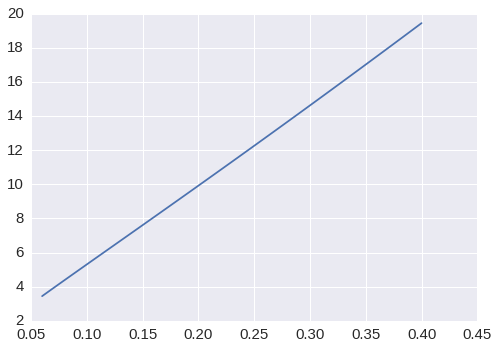

In [457]:
s1,s2 = beta(T)
#plot(T,s1)
plot(T,s2/s1)

In [337]:
dd = valid[(valid.number==2) & (valid.roach_dac_attenuation==39)]
dd = dd.iloc[3:]
x = 1e6*(1-dd.res_f_0/dd.res_f_0.max())
tt = dd.package_temperature
mask = tt<.2
x = x[mask]
tt = tt[mask]
qi = 1e6/dd.res_Q_i
qi = qi[mask]
q = 1e6/dd.res_Q
q = q[mask]

In [458]:
ddr = dd.to_records()

In [459]:
ddr.dtype

dtype((numpy.record, [('index', '<i8'), ('S_frequency', 'O'), ('S_xx', 'O'), ('S_xy', 'O'), ('S_yy', 'O'), ('analysis_epoch', '<f8'), ('number', '<i8'), ('res_A_mag', '<f8'), ('res_A_mag_error', '<f8'), ('res_A_slope', '<f8'), ('res_A_slope_error', '<f8'), ('res_Q', '<f8'), ('res_Q_e', '<c16'), ('res_Q_e_imag', '<f8'), ('res_Q_e_imag_error', '<f8'), ('res_Q_e_real', '<f8'), ('res_Q_e_real_error', '<f8'), ('res_Q_error', '<f8'), ('res_Q_i', '<f8'), ('res_delay', '<f8'), ('res_delay_error', '<f8'), ('res_f_0', '<f8'), ('res_f_0_error', '<f8'), ('res_f_min', '<f8'), ('res_f_min_error', '<i8'), ('res_frequency_data', 'O'), ('res_model_frequency', 'O'), ('res_model_s21', 'O'), ('res_model_s21_at_f_0', '<c16'), ('res_model_s21_normalized', 'O'), ('res_model_s21_normalized_at_f_0', '<c16'), ('res_phi', '<f8'), ('res_phi_error', '<f8'), ('res_redchi', '<f8'), ('res_s21_data', 'O'), ('res_s21_data_normalized', 'O'), ('res_s21_errors', 'O'), ('roach_adc_sample_rate', '<f8'), ('roach_bank', '<i8'

In [460]:
np.savez('/artemis/readout/archive/2016-12-12-stanford-almn-res2-temp-sweep.npz',records = ddr)

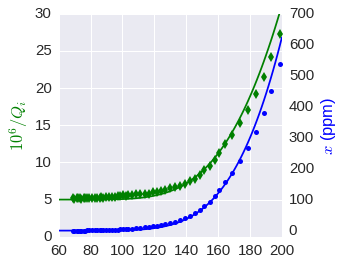

In [341]:
fig,ax2 = subplots(1,1,figsize=(4,4))
ax = ax2.twinx()
ax.plot(T*1e3,1e6*xqp(T,Tc=.73)*.26,color='b')
ax.plot(tt*1e3,x,'.',ms=10,color='b')
ax.set_ylim(-20,700)
ax2.plot(tt*1e3,qi,'gd')
ax2.plot(T*1e3,.17*1e6/qiqp(T,Tc=.73)+5,color='g')
ax2.set_ylim(0,30)
ax2.grid(True)
ax.grid(False)
ax.set_xlabel('Temperature (mK)')
ax.set_ylabel('$x$ (ppm)',color='blue')
ax2.set_ylabel('$10^6/Q_i$',color='green')
savefig('/home/gjones/paper_plots/almn_qi_x_mb.pdf',bbox_inches='tight')

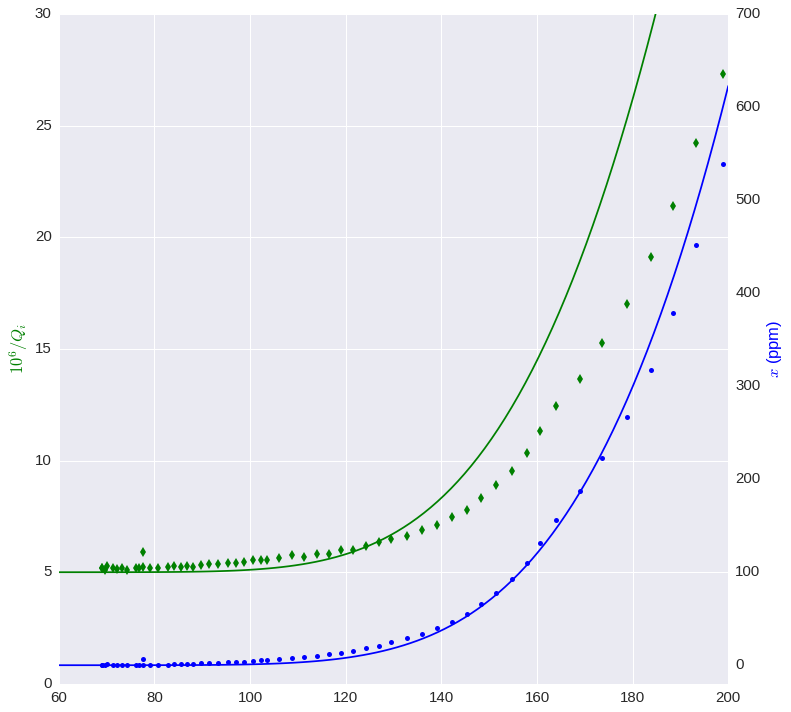

In [335]:
fig,ax2 = subplots(1,1,figsize=(12,12))
ax = ax2.twinx()
ax.plot(T*1e3,1e6*xqp(T,Tc=.73)*.26,color='b')
ax.plot(tt*1e3,x,'.',ms=10,color='b')
ax.set_ylim(-20,700)
ax2.plot(tt*1e3,qi,'gd')
ax2.plot(T*1e3,.26*1e6/qiqp(T,Tc=.73)+5,color='g')
ax2.set_ylim(0,30)
ax2.grid(True)
ax.grid(False)
ax.set_xlabel('Temperature (mK)')
ax.set_ylabel('$x$ (ppm)',color='blue')
ax2.set_ylabel('$10^6/Q_i$',color='green')
#savefig('/home/gjones/paper_plots/almn_qi_x_mb.pdf',bbox_inches='tight')

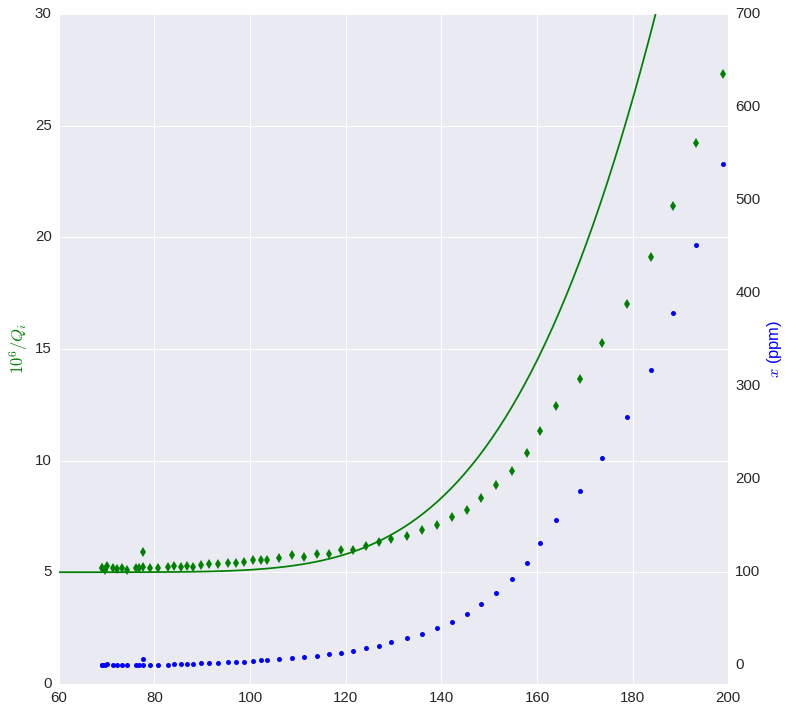

In [265]:
fig,ax2 = subplots(1,1,figsize=(12,12))
ax = ax2.twinx()
ax.plot(T*1e3,np.exp(T/.0073)*.26,color='b')
ax.plot(tt*1e3,x,'.',ms=10,color='b')
ax.set_ylim(-20,700)
ax2.plot(tt*1e3,qi,'gd')
ax2.plot(T*1e3,.26*1e6/qiqp(T,Tc=.73)+5,color='g')
ax2.set_ylim(0,30)
ax2.grid(True)
ax.grid(False)
ax.set_xlabel('Temperature (mK)')
ax.set_ylabel('$x$ (ppm)',color='blue')
ax2.set_ylabel('$10^6/Q_i$',color='green')
#savefig('/home/gjones/paper_plots/almn_qi_x_mb.pdf',bbox_inches='tight')

In [257]:
np.savez('/artemis/readout/archive/2016-12-08-almn-qi-x-data.npz',x=x,qi=qi,temperature=tt)

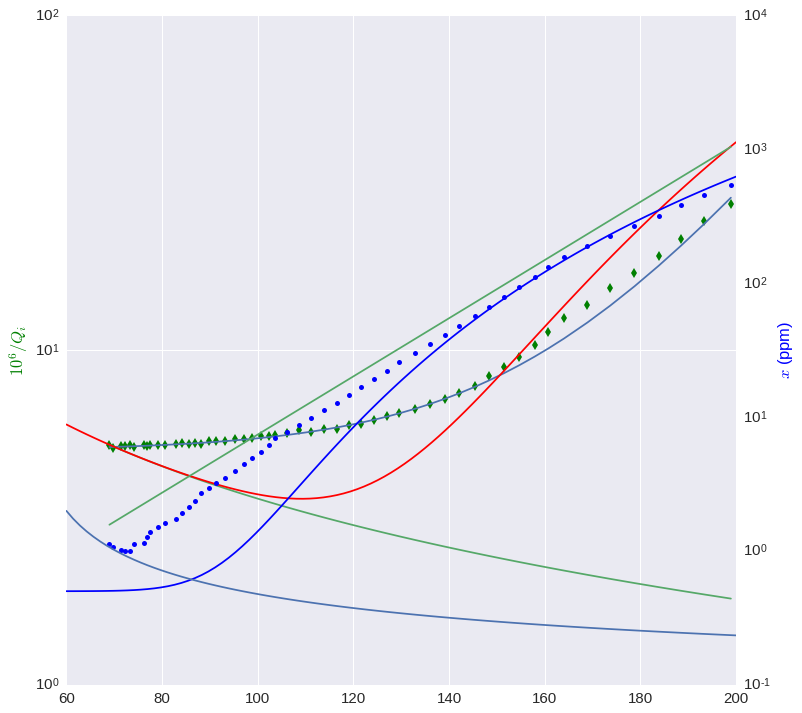

In [338]:
fig,ax2 = subplots(1,1,figsize=(12,12))
ax = ax2.twinx()
ax.plot(T*1e3,1e6*xqp(T,Tc=.73)*.26+.5,color='b')
ax.plot(tt*1e3,x+1,'.',ms=10,color='b')
ax.plot(T*1e3,1/xtls(T))
#ax.set_ylim(-20,700)
ax2.plot(tt*1e3,qi,'gd')
ax2.plot(tt*1e3,np.exp((tt-0.1200)*40)+5)
ax.plot(tt*1e3,np.exp((tt-0.0600)*50))
ax2.plot(tt*1e3,100*qitls(tt))
#ax2.plot(T*1e3,.26*1e6/qiqp(T,Tc=.73),color='g')
ax2.plot(T*1e3,.26*1e6/qiqp(T,Tc=.73)+100*qitls(T),color='r')
#ax2.set_ylim(0,30)
ax2.grid(True)
ax.grid(False)
ax.set_xlabel('Temperature (mK)')
ax.set_ylabel('$x$ (ppm)',color='blue')
ax2.set_ylabel('$10^6/Q_i$',color='green')
ax2.set_yscale('log')
ax.set_yscale('log')
#savefig('/home/gjones/paper_plots/almn_qi_x_mb.pdf',bbox_inches='tight')

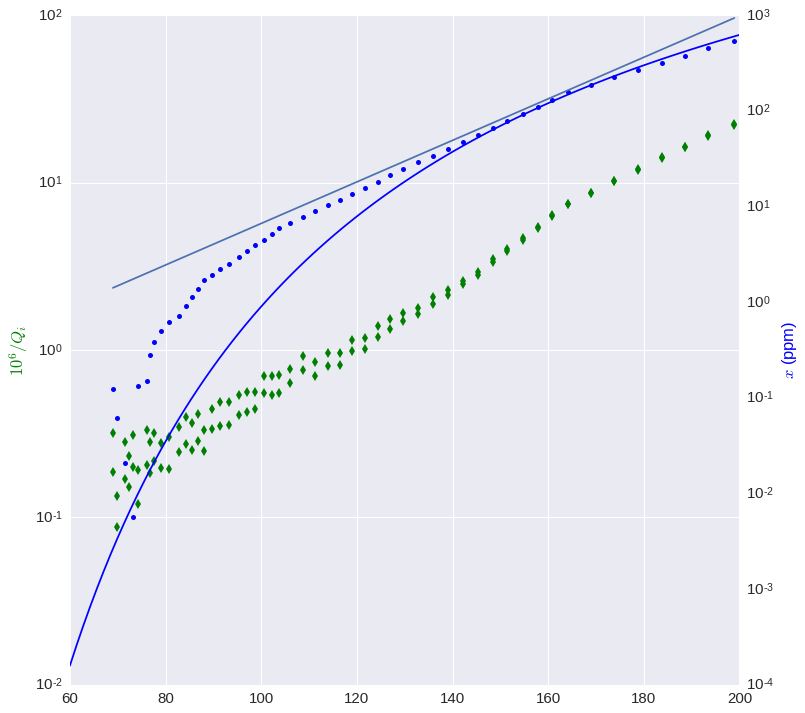

In [399]:
fig,ax2 = subplots(1,1,figsize=(12,12))
ax = ax2.twinx()
ax.plot(T*1e3,1e6*xqp(T,Tc=.73)*.26,color='b')
ax.plot(tt*1e3,x,'.',ms=10,color='b')
#ax.set_ylim(-20,700)
ax2.plot(tt*1e3,q-11,'gd')
ax2.plot(tt*1e3,qi-5,'gd')
#ax2.plot(tt*1e3,np.exp((tt-0.1200)*40))
ax.plot(tt*1e3,0.9*np.exp((tt-0.0600)*50))
#ax2.plot(T*1e3,.26*1e6/qiqp(T,Tc=.73),color='g')
#ax2.set_ylim(0,30)
ax2.grid(True)
ax.grid(False)
ax.set_xlabel('Temperature (mK)')
ax.set_ylabel('$x$ (ppm)',color='blue')
ax2.set_ylabel('$10^6/Q_i$',color='green')
ax2.set_yscale('log')
ax.set_yscale('log')
#savefig('/home/gjones/paper_plots/almn_qi_x_mb.pdf',bbox_inches='tight')

(0.05, 0.25)

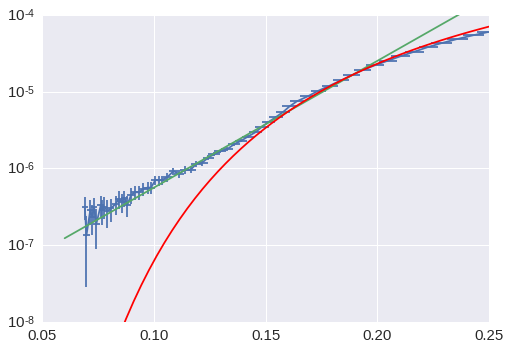

In [450]:
errorbar(dd.package_temperature.values,1/dd.res_Q.values-11e-6,yerr=1*dd.res_Q_error.values/(dd.res_Q.values**2),xerr=dd.package_temperature.values*0.02)
#plot(T,1.2e-6*np.exp((T-0.1200)*38))
plot(T,1.2e-6*np.exp(T*38)*np.exp(-0.1200*38))
plot(T,.15/qiqp(T,Tc=.73),color='r')
yscale('log')
ylim(1e-8,1e-4)
xlim(0.05,0.25)

In [426]:
1.2e-6*np.exp(-0.1200*38)

1.2554470732112163e-08

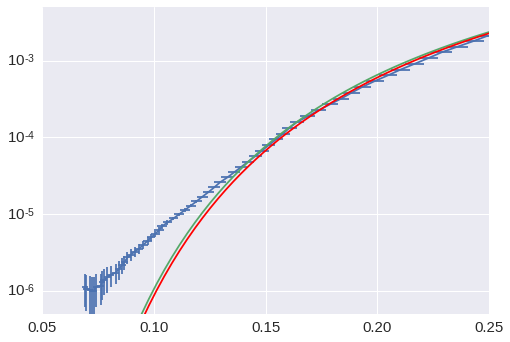

In [448]:
errorbar(dd.package_temperature.values,1-dd.res_f_0/(dd.res_f_0.max()*(1+1e-6)),yerr=10*dd.res_f_0_error.values/dd.res_f_0.max(),xerr=dd.package_temperature.values*0.02)
plot(T,.4*np.exp(-1.76*.73/T))
plot(T,xqp(T,Tc=.73)*.25,color='r')
ylim(5e-7,5e-3)
xlim(0.05,0.25)
#plot(T,1.2e-6*np.exp((T-0.1200)*38))
yscale('log')

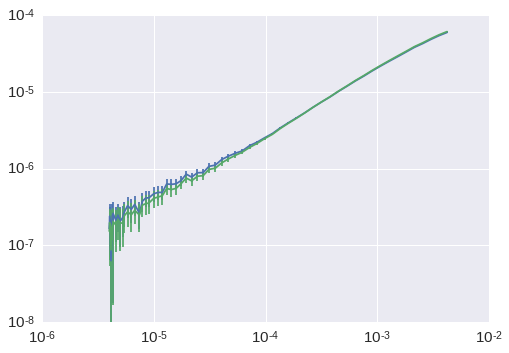

In [390]:
errorbar(2*(1-dd.res_f_0/(dd.res_f_0.max()*(1+2e-6))),(1/dd.res_Q.values-11.07e-6),xerr=1*dd.res_f_0_error.values/dd.res_f_0.max(),yerr=1*dd.res_Q_error.values/(dd.res_Q.values**2))
errorbar(2*(1-dd.res_f_0/(dd.res_f_0.max()*(1+2e-6))),(1/dd.res_Q_i.values-5e-6),xerr=1*dd.res_f_0_error.values/dd.res_f_0.max(),yerr=1*dd.res_Q_error.values/(dd.res_Q.values**2))
#plot(T,1.2e-6*np.exp((T-0.1200)*38))
yscale('log')
xscale('log')

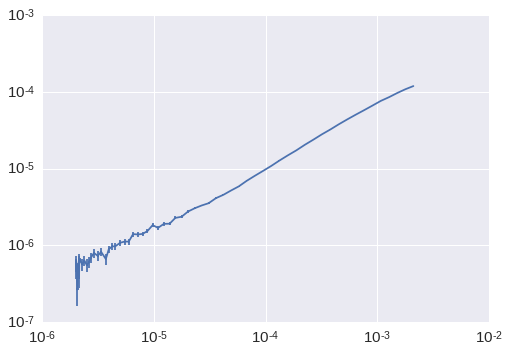

In [370]:
errorbar(1-dd.res_f_0/(dd.res_f_0.max()*(1+2e-6)),2*(1/dd.res_Q.values-11e-6),xerr=1*dd.res_f_0_error.values/dd.res_f_0.max(),yerr=1*dd.res_Q_error.values/(dd.res_Q.values**2))
#plot(T,1.2e-6*np.exp((T-0.1200)*38))
yscale('log')
xscale('log')

In [382]:
1/dd.res_Q.max()

1.1133450453164235e-05

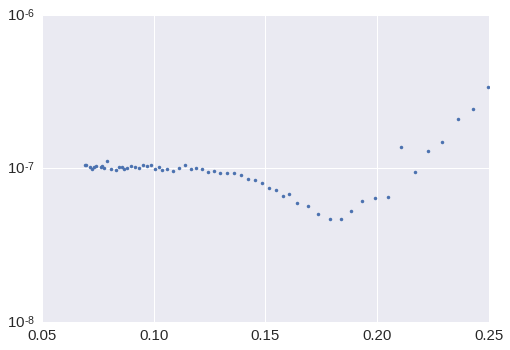

In [371]:
semilogy(dd.package_temperature,dd.res_Q_error/dd.res_Q**2,'.')

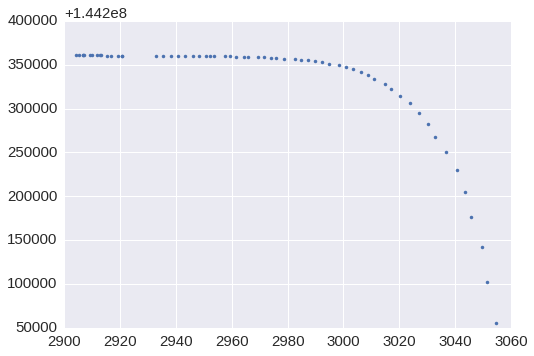

In [381]:
plot(dd.res_A_mag,dd.res_f_0,'.')

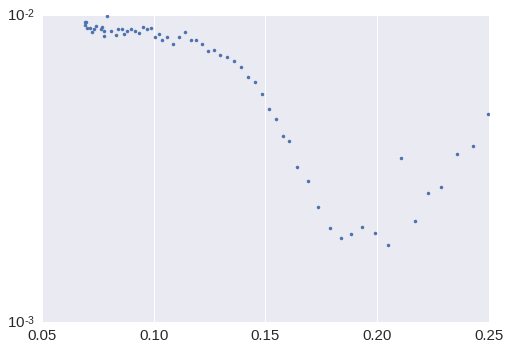

In [322]:
semilogy(dd.package_temperature,dd.res_Q_error/dd.res_Q,'.')

In [ ]:
np.tanh(h * f / (2 * k_B * T))

In [258]:
1e6*10./145e6

0.06896551724137931

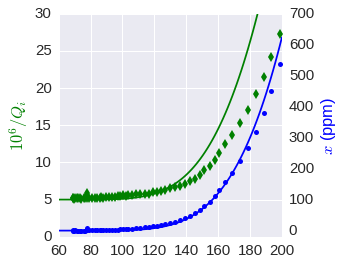

In [252]:
fig,ax2 = subplots(1,1,figsize=(4,4))
ax = ax2.twinx()
ax.plot(T*1e3,1e6*xqp(T,Tc=.73)*.26,color='b')
ax.plot(tt*1e3,x,'.',ms=10,color='b')
ax.set_ylim(-20,700)
ax2.plot(tt*1e3,qi,'gd')
ax2.plot(T*1e3,.26*1e6/qiqp(T,Tc=.73)+5,color='g')
ax2.set_ylim(0,30)
ax2.grid(True)
ax.grid(False)
ax.set_xlabel('Temperature (mK)')
ax.set_ylabel('$x$ (ppm)',color='blue')
ax2.set_ylabel('$10^6/Q_i$',color='green')
#savefig('/home/gjones/paper_plots/almn_qi_x_mb.pdf',bbox_inches='tight')

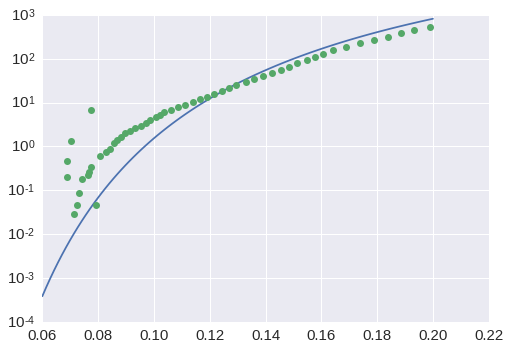

In [215]:
plot(T,1e6*xqp(T,Tc=.7)*.26)
plot(tt,x,'o')
#ylim(0,40)
yscale('log')

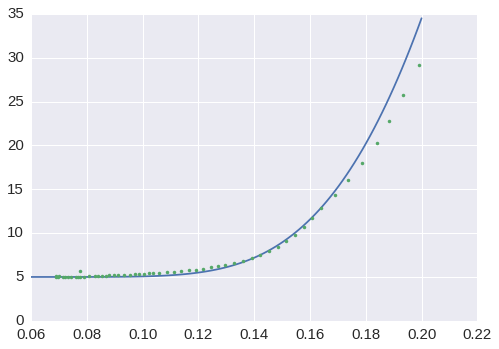

In [94]:
plot(T,.25*1e6/qiqp(T,Tc=.76)+5)
plot(tt,qi,'.')

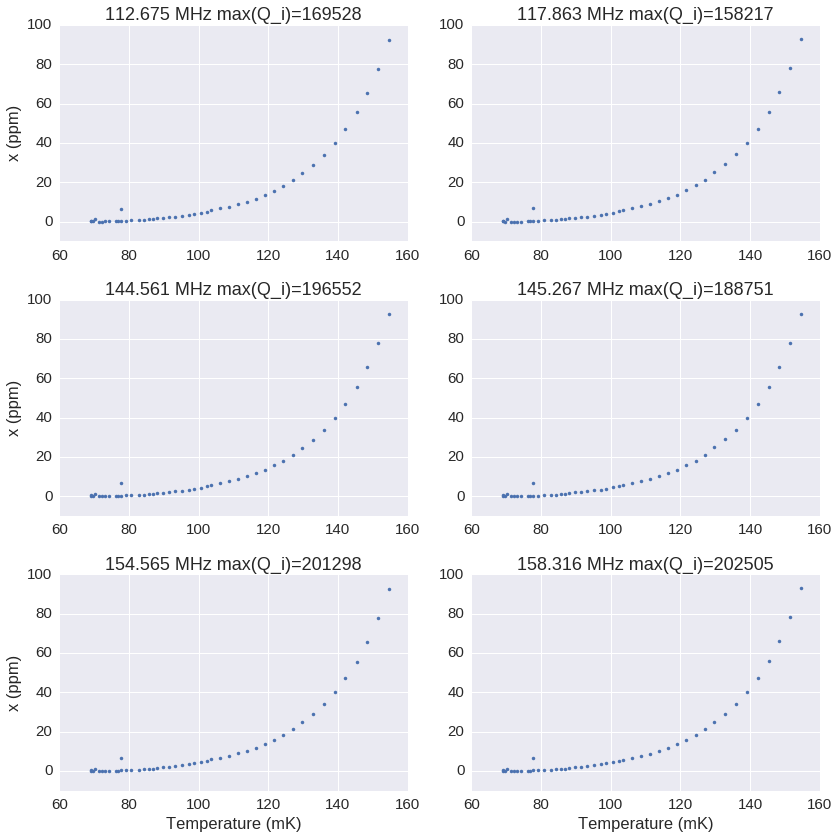

In [73]:
fig,axs = subplots(3,2,figsize=(12,12))
for k,ax in enumerate(axs.flatten()):
    dd = valid[(valid.number==k) & (valid.roach_dac_attenuation==39)]
    ax.plot(dd.package_temperature*1e3,1e6*(1-dd.res_f_0/dd.res_f_0.max()),'.')
    ax.set_title('%.3f MHz max(Q_i)=%.0f' % (dd.res_f_0.max()/1e6,dd.res_Q_i.max()))
    ax.set_xlim(60,160)
    ax.set_ylim(-10,100)
for ax in axs[:,0]:
    ax.set_ylabel('x (ppm)')
for ax in axs[-1,:]:
    ax.set_xlabel('Temperature (mK)')
fig.tight_layout()

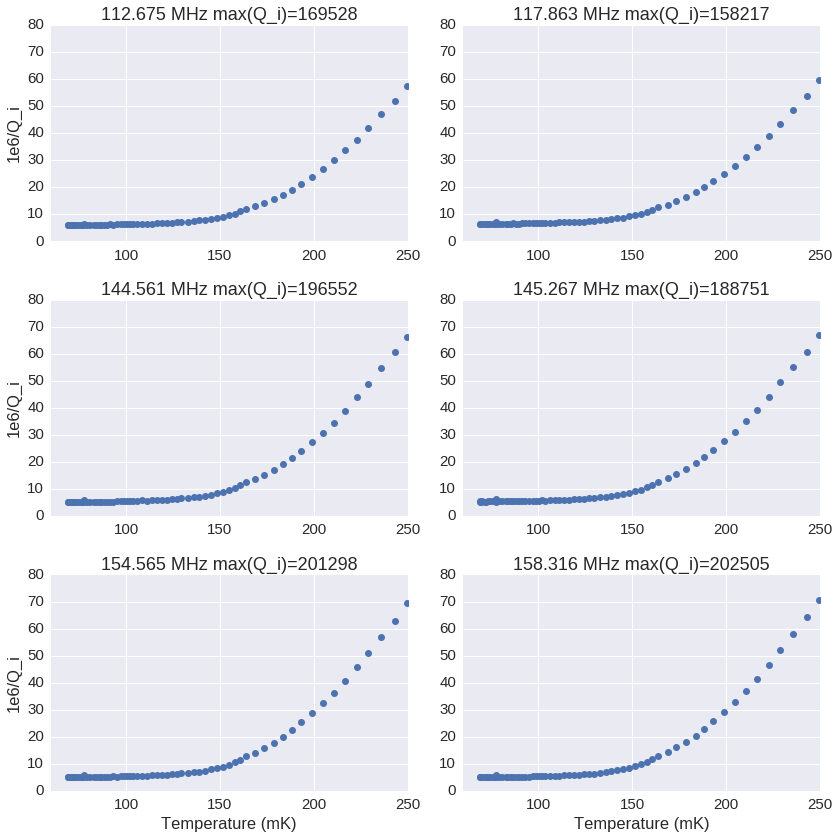

In [77]:
fig,axs = subplots(3,2,figsize=(12,12))
for k,ax in enumerate(axs.flatten()):
    dd = valid[(valid.number==k)& (valid.roach_dac_attenuation==39)]
    ax.plot(dd.package_temperature*1e3,1e6/dd.res_Q_i,'o')
    ax.set_title('%.3f MHz max(Q_i)=%.0f' % (dd.res_f_0.max()/1e6,dd.res_Q_i.max()))
    ax.set_xlim(60,250)
    ax.set_ylim(0,80)
for ax in axs[:,0]:
    ax.set_ylabel('1e6/Q_i')
for ax in axs[-1,:]:
    ax.set_xlabel('Temperature (mK)')
fig.tight_layout()

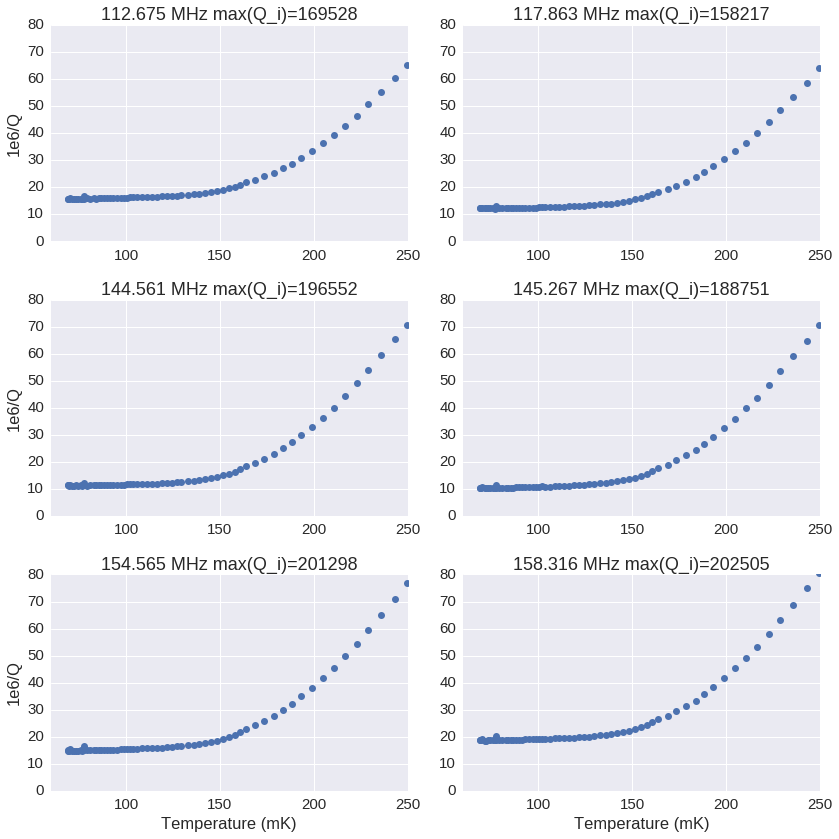

In [76]:
fig,axs = subplots(3,2,figsize=(12,12))
for k,ax in enumerate(axs.flatten()):
    dd = valid[(valid.number==k) & (valid.roach_dac_attenuation==39)]
    ax.plot(dd.package_temperature*1e3,1e6/dd.res_Q,'o')
    ax.set_title('%.3f MHz max(Q_i)=%.0f' % (dd.res_f_0.max()/1e6,dd.res_Q_i.max()))
    ax.set_xlim(60,250)
    ax.set_ylim(0,80)
for ax in axs[:,0]:
    ax.set_ylabel('1e6/Q')
for ax in axs[-1,:]:
    ax.set_xlabel('Temperature (mK)')
fig.tight_layout()

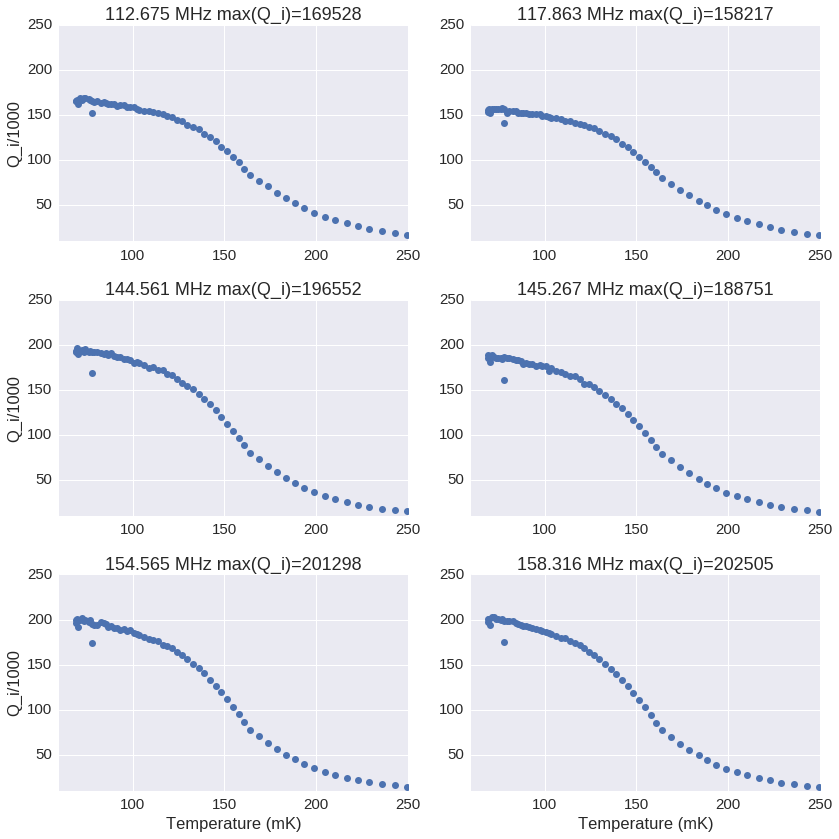

In [78]:
fig,axs = subplots(3,2,figsize=(12,12))
for k,ax in enumerate(axs.flatten()):
    dd = valid[(valid.number==k)& (valid.roach_dac_attenuation==39)]
    ax.plot(dd.package_temperature*1e3,dd.res_Q_i/1000,'o')
    ax.set_title('%.3f MHz max(Q_i)=%.0f' % (dd.res_f_0.max()/1e6,dd.res_Q_i.max()))
    ax.set_xlim(60,250)
    ax.set_ylim(10,250)
for ax in axs[:,0]:
    ax.set_ylabel('Q_i/1000')
for ax in axs[-1,:]:
    ax.set_xlabel('Temperature (mK)')
fig.tight_layout()

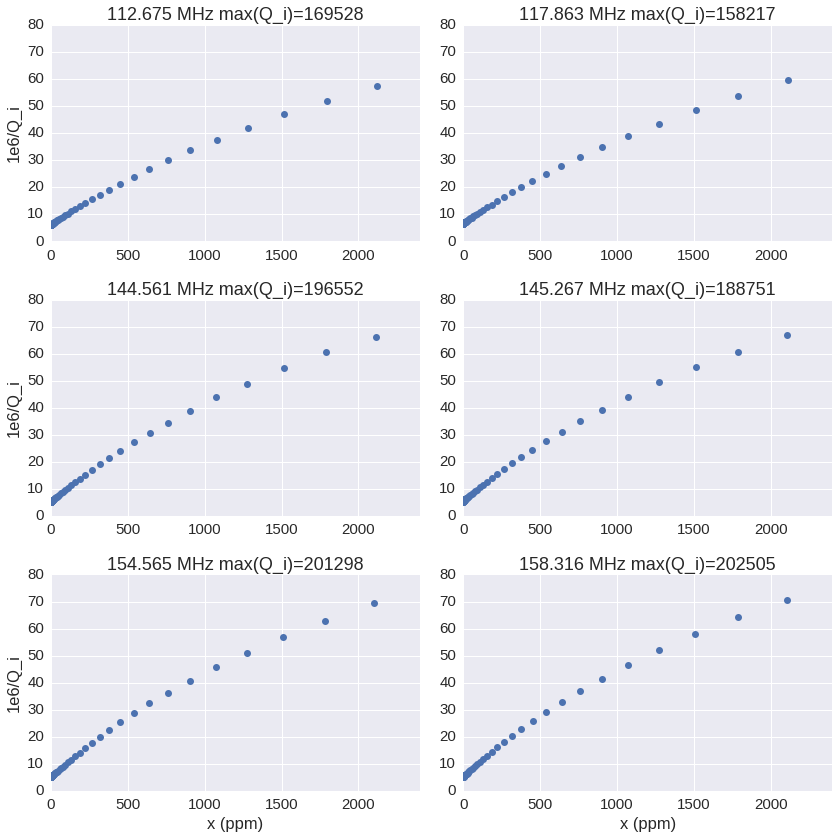

In [79]:
fig,axs = subplots(3,2,figsize=(12,12))
for k,ax in enumerate(axs.flatten()):
    dd = valid[(valid.number==k)& (valid.roach_dac_attenuation==39)]
    ax.plot(1e6*(1-dd.res_f_0/dd.res_f_0.max()),1e6/dd.res_Q_i,'o')
    ax.set_title('%.3f MHz max(Q_i)=%.0f' % (dd.res_f_0.max()/1e6,dd.res_Q_i.max()))
    ax.set_xlim(0,2400)
    ax.set_ylim(0,80)
for ax in axs[:,0]:
    ax.set_ylabel('1e6/Q_i')
for ax in axs[-1,:]:
    ax.set_xlabel('x (ppm)')
fig.tight_layout()

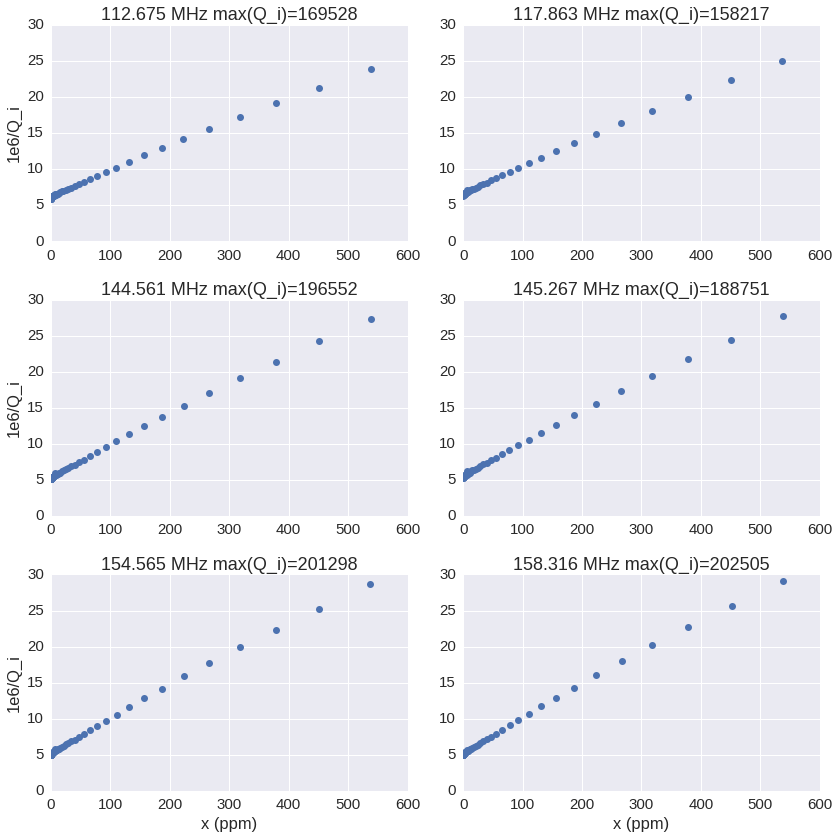

In [317]:
fig,axs = subplots(3,2,figsize=(12,12))
for k,ax in enumerate(axs.flatten()):
    dd = valid[(valid.number==k)& (valid.roach_dac_attenuation==39)]
    ax.plot(1e6*(1-dd.res_f_0/dd.res_f_0.max()),1e6/dd.res_Q_i,'o')
    ax.set_title('%.3f MHz max(Q_i)=%.0f' % (dd.res_f_0.max()/1e6,dd.res_Q_i.max()))
    ax.set_xlim(0,600)
    ax.set_ylim(0,30)
for ax in axs[:,0]:
    ax.set_ylabel('1e6/Q_i')
for ax in axs[-1,:]:
    ax.set_xlabel('x (ppm)')
fig.tight_layout()

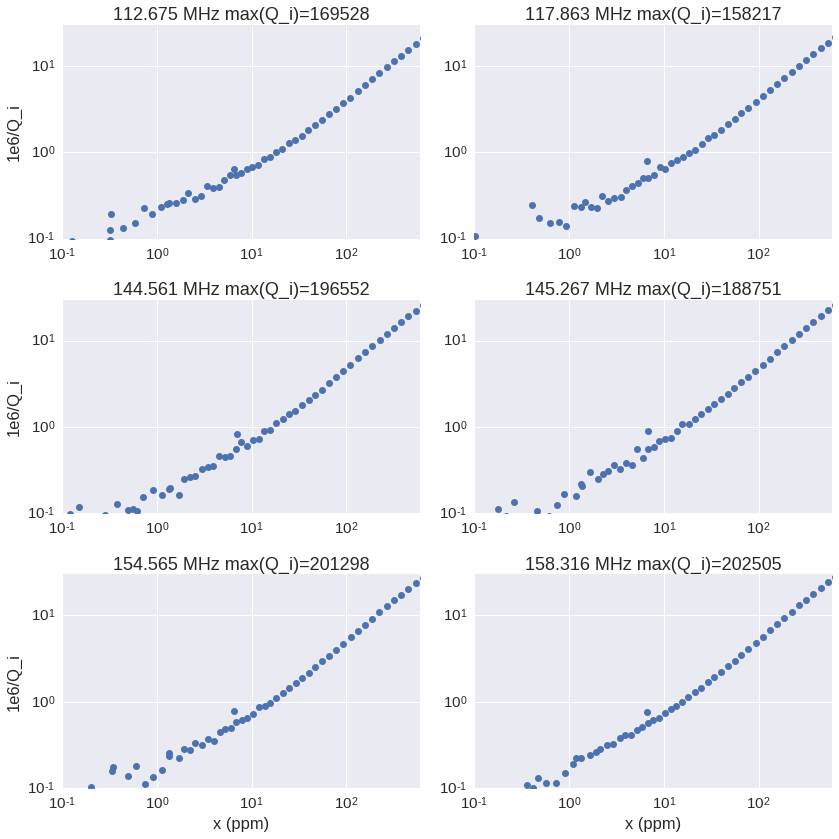

In [319]:
fig,axs = subplots(3,2,figsize=(12,12))
for k,ax in enumerate(axs.flatten()):
    dd = valid[(valid.number==k)& (valid.roach_dac_attenuation==39)]
    ax.plot(1e6*(1-dd.res_f_0/dd.res_f_0.max()),1e6/dd.res_Q_i-1e6/dd.res_Q_i.max(),'o')
    ax.set_title('%.3f MHz max(Q_i)=%.0f' % (dd.res_f_0.max()/1e6,dd.res_Q_i.max()))
    ax.set_xlim(0.1,600)
    ax.set_ylim(0.1,30)
    ax.set_xscale('log')
    ax.set_yscale('log')
for ax in axs[:,0]:
    ax.set_ylabel('1e6/Q_i')
for ax in axs[-1,:]:
    ax.set_xlabel('x (ppm)')
fig.tight_layout()

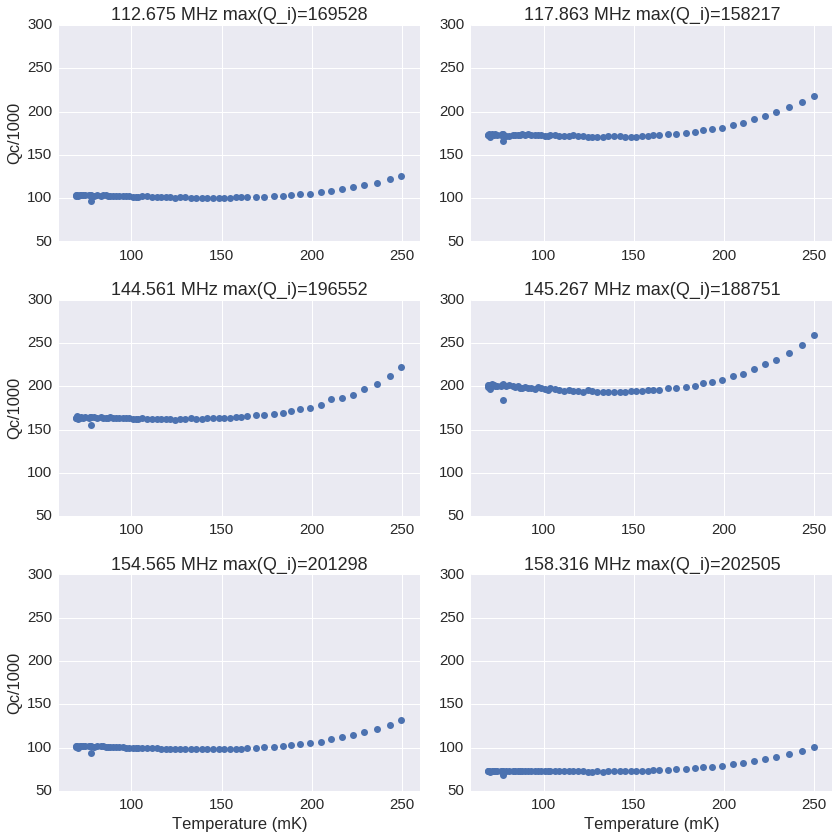

In [80]:
fig,axs = subplots(3,2,figsize=(12,12))
for k,ax in enumerate(axs.flatten()):
    dd = valid[(valid.number==k)& (valid.roach_dac_attenuation==39)]
    ax.plot(dd.package_temperature*1e3,1e-3/np.real(1/dd.res_Q_e),'o')
    ax.set_title('%.3f MHz max(Q_i)=%.0f' % (dd.res_f_0.max()/1e6,dd.res_Q_i.max()))
    ax.set_xlim(60,260)
    ax.set_ylim(50,300)
for ax in axs[:,0]:
    ax.set_ylabel('Qc/1000')
for ax in axs[-1,:]:
    ax.set_xlabel('Temperature (mK)')
fig.tight_layout()

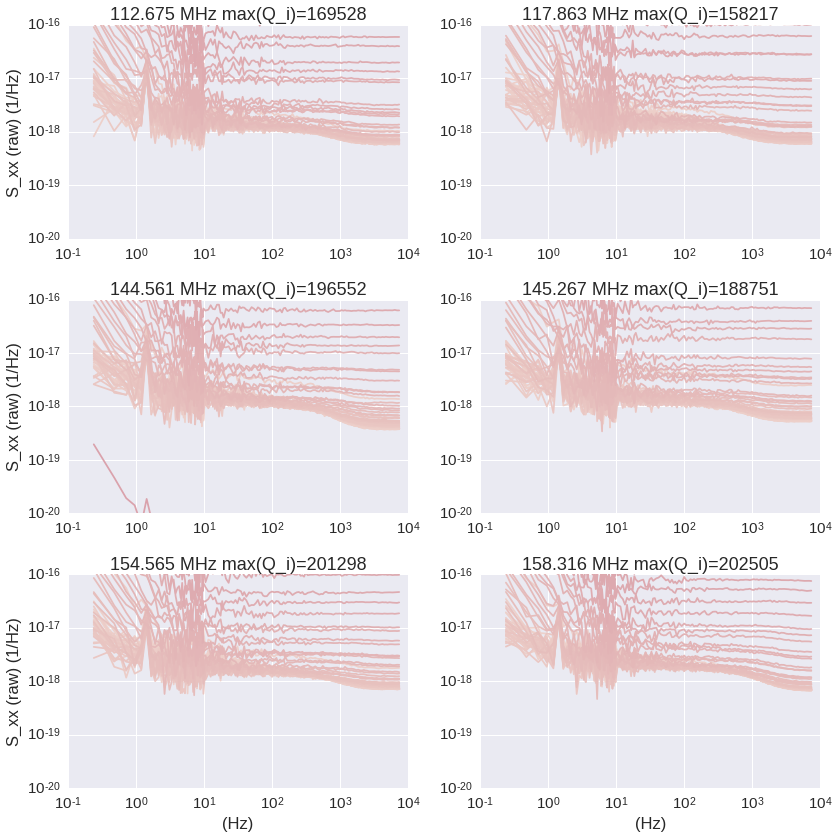

In [81]:
fig,axs = subplots(3,2,figsize=(12,12))
for k,ax in enumerate(axs.flatten()):
    dd = valid[(valid.number==k)& (valid.roach_dac_attenuation==39)]
    for m,row in dd.iterrows():
        ax.loglog(row.S_frequency,row.S_xx,
                  color = get_color(row.package_temperature),
                 label=('%.0f mK' % (1e3*row.package_temperature)))
    ax.set_ylim(1e-20,1e-16)
    ax.set_title('%.3f MHz max(Q_i)=%.0f' % (dd.res_f_0.max()/1e6,dd.res_Q_i.max()))
for ax in axs[:,0]:
    ax.set_ylabel('S_xx (raw) (1/Hz)')
for ax in axs[-1,:]:
    ax.set_xlabel('(Hz)')
#axs[0,0].legend(loc='lower left',prop=dict(size='x-small'),ncol=3)
fig.tight_layout()

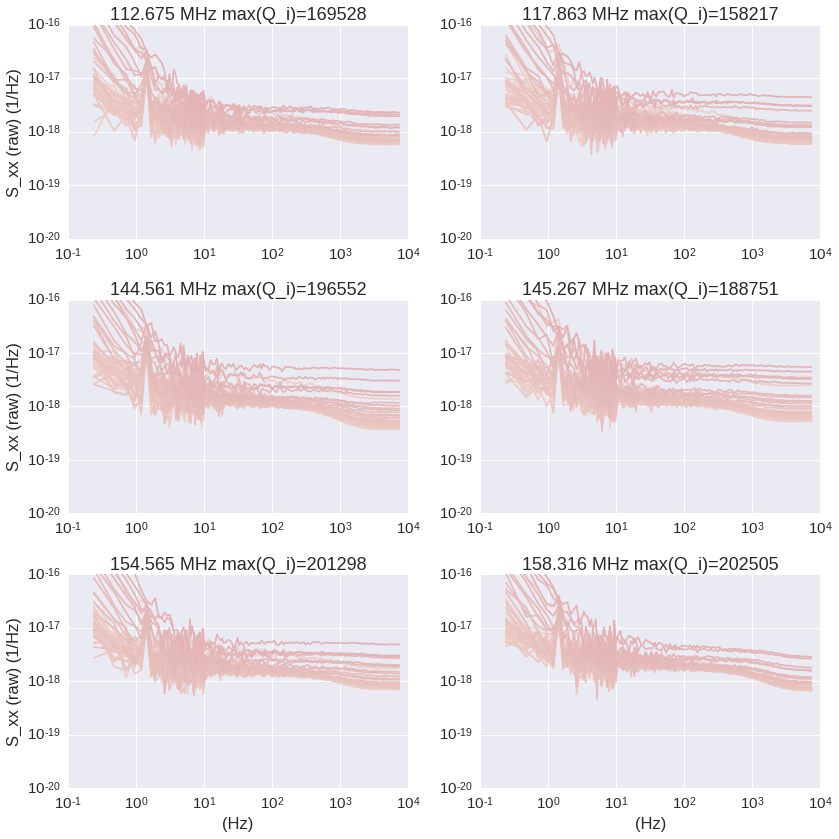

In [82]:
fig,axs = subplots(3,2,figsize=(12,12))
for k,ax in enumerate(axs.flatten()):
    dd = valid[(valid.number==k) & (valid.package_temperature<160e-3)& (valid.roach_dac_attenuation==39)]
    for m,row in dd.iterrows():
        ax.loglog(row.S_frequency,row.S_xx,
                  color = get_color(row.package_temperature),
                 label=('%.0f mK' % (1e3*row.package_temperature)))
    ax.set_ylim(1e-20,1e-16)
    ax.set_title('%.3f MHz max(Q_i)=%.0f' % (dd.res_f_0.max()/1e6,dd.res_Q_i.max()))
for ax in axs[:,0]:
    ax.set_ylabel('S_xx (raw) (1/Hz)')
for ax in axs[-1,:]:
    ax.set_xlabel('(Hz)')
#axs[0,0].legend(loc='lower left',prop=dict(size='x-small'),ncol=3)
fig.tight_layout()

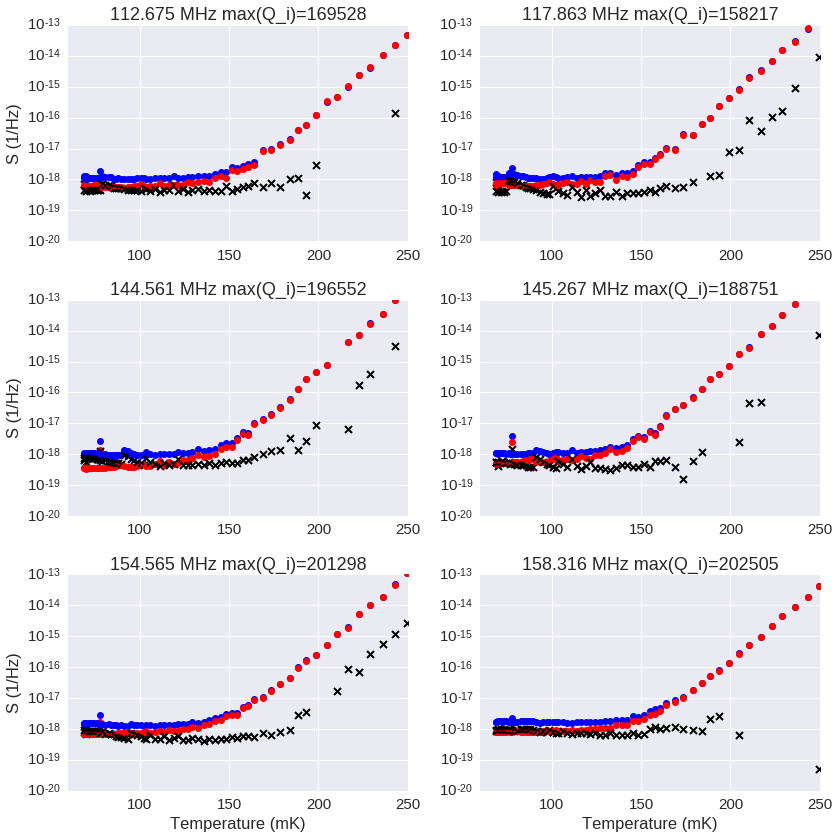

In [83]:
fig,axs = subplots(3,2,figsize=(12,12))
for k,ax in enumerate(axs.flatten()):
    dd = valid[(valid.number==k)& (valid.roach_dac_attenuation==39)]
    for m,row in dd.iterrows():
        mask = (row.S_frequency>100) & (row.S_frequency<500)
        ax.semilogy(row.package_temperature*1e3,np.median(row.S_xx[mask]),'bo')
        ax.semilogy(row.package_temperature*1e3,np.median(row.S_yy[mask]),'ro')
        ax.semilogy(row.package_temperature*1e3,np.median(row.S_xx[mask])-np.median(row.S_yy[mask]),'kx',mew=2)
    ax.set_ylim(1e-20,1e-13)
    ax.set_xlim(60,250)
    ax.set_title('%.3f MHz max(Q_i)=%.0f' % (dd.res_f_0.max()/1e6,dd.res_Q_i.max()))
for ax in axs[:,0]:
    ax.set_ylabel('S (1/Hz)')
for ax in axs[-1,:]:
    ax.set_xlabel('Temperature (mK)')
fig.tight_layout()

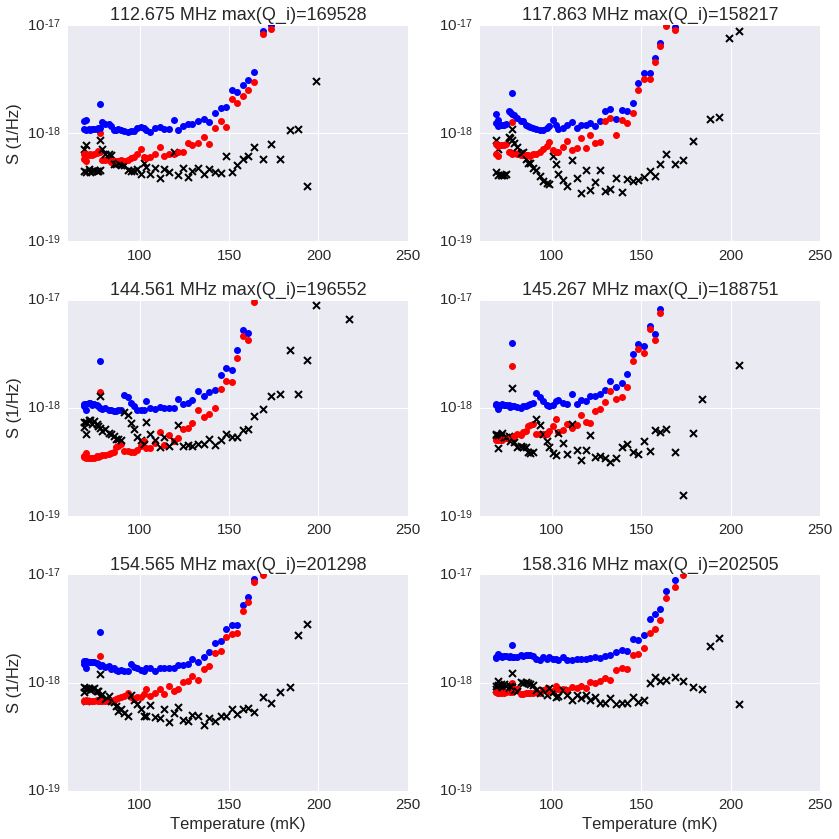

In [84]:
fig,axs = subplots(3,2,figsize=(12,12))
for k,ax in enumerate(axs.flatten()):
    dd = valid[(valid.number==k)& (valid.roach_dac_attenuation==39)]
    for m,row in dd.iterrows():
        mask = (row.S_frequency>100) & (row.S_frequency<500)
        ax.semilogy(row.package_temperature*1e3,np.median(row.S_xx[mask]),'bo')
        ax.semilogy(row.package_temperature*1e3,np.median(row.S_yy[mask]),'ro')
        ax.semilogy(row.package_temperature*1e3,np.median(row.S_xx[mask])-np.median(row.S_yy[mask]),'kx',mew=2)
    ax.set_ylim(1e-19,1e-17)
    ax.set_xlim(60,250)
    ax.set_title('%.3f MHz max(Q_i)=%.0f' % (dd.res_f_0.max()/1e6,dd.res_Q_i.max()))
for ax in axs[:,0]:
    ax.set_ylabel('S (1/Hz)')
for ax in axs[-1,:]:
    ax.set_xlabel('Temperature (mK)')
fig.tight_layout()

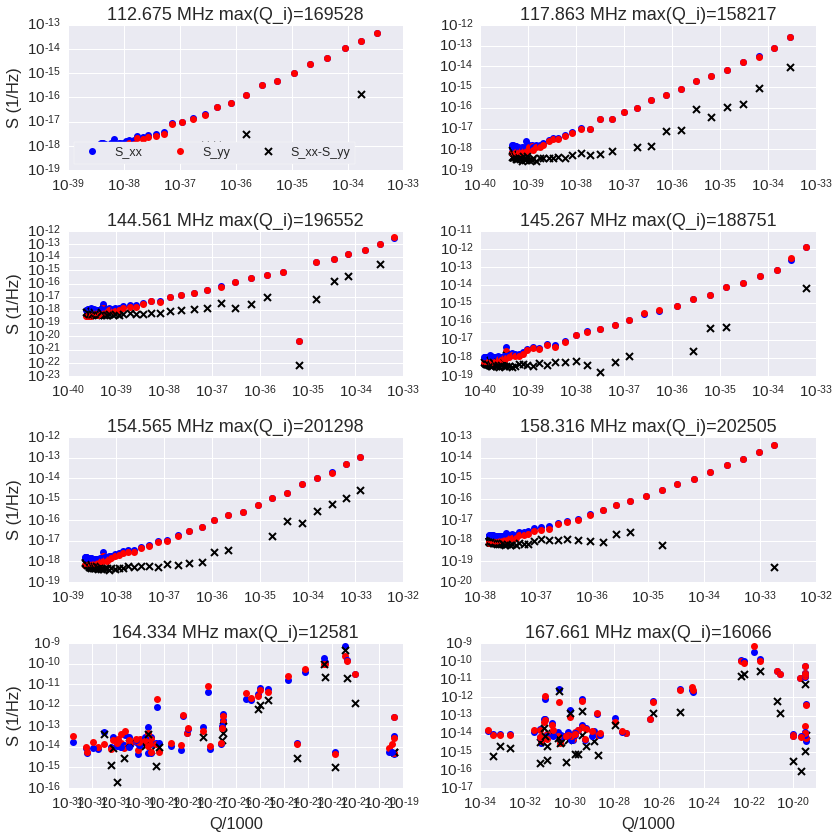

In [85]:
fig,axs = subplots(4,2,figsize=(12,12))
for k,ax in enumerate(axs.flatten()):
    dd = valid[(valid.number==k)& (valid.roach_dac_attenuation==39)]
    for m,row in dd.iterrows():
        mask = (row.S_frequency>100) & (row.S_frequency<500)
        ax.loglog(1/row.res_Q**8,np.median(row.S_xx[mask]),'bo')
        ax.loglog(1/row.res_Q**8,np.median(row.S_yy[mask]),'ro')
        ax.loglog(1/row.res_Q**8,np.median(row.S_xx[mask])-np.median(row.S_yy[mask]),'kx',mew=2)
    #ax.set_ylim(1e-20,1e-12)
    #ax.set_xlim(2e-40,1e-32)
    ax.set_xlim()
    ax.set_title('%.3f MHz max(Q_i)=%.0f' % (dd.res_f_0.max()/1e6,dd.res_Q_i.max()))
for ax in axs[:,0]:
    ax.set_ylabel('S (1/Hz)')
for ax in axs[-1,:]:
    ax.set_xlabel('Q/1000')
axs[0,0].legend(['S_xx','S_yy','S_xx-S_yy'],loc='lower left',prop=dict(size='x-small'),ncol=3,frameon=True)
fig.tight_layout()